# Component 2 – Fuel consumption rating  

In [55]:
import pandas as pd
df = pd.read_csv("Fuel Consumption Ratings.csv")
print(bool("False"))
eval("False")

True


False

# Exploratory data analysis (EDA)

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_M,CO2 EMISSIONS
0,2010,ACURA,CSX,COMPACT,2.0,4,AS5,X,10.9,7.8,9.5,30,219
1,2010,ACURA,CSX,COMPACT,2.0,4,M5,X,10.0,7.6,8.9,32,205
2,2010,ACURA,CSX,COMPACT,2.0,4,M6,Z,11.6,8.1,10.0,28,230
3,2010,ACURA,MDX AWD,SUV,3.7,6,AS6,Z,14.8,11.3,13.2,21,304
4,2010,ACURA,RDX AWD TURBO,SUV,2.3,4,AS5,Z,13.2,10.3,11.9,24,274
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5354,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
5355,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
5356,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
5357,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [6]:
# display information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5359 entries, 0 to 5358
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MODELYEAR               5359 non-null   int64  
 1   MAKE                    5359 non-null   object 
 2   MODEL                   5359 non-null   object 
 3   VEHICLECLASS            5359 non-null   object 
 4   ENGINESIZE              5359 non-null   float64
 5   CYLINDERS               5359 non-null   int64  
 6   TRANSMISSION            5359 non-null   object 
 7   FUELTYPE                5359 non-null   object 
 8   FUELCONSUMPTION_CITY    5359 non-null   float64
 9   FUELCONSUMPTION_HWY     5359 non-null   float64
 10  FUELCONSUMPTION_COMB    5359 non-null   float64
 11  FUELCONSUMPTION_COMB_M  5359 non-null   int64  
 12  CO2 EMISSIONS           5359 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 544.4+ KB


In [7]:
# inspect the data types of each column
print(df.dtypes)

MODELYEAR                   int64
MAKE                       object
MODEL                      object
VEHICLECLASS               object
ENGINESIZE                float64
CYLINDERS                   int64
TRANSMISSION               object
FUELTYPE                   object
FUELCONSUMPTION_CITY      float64
FUELCONSUMPTION_HWY       float64
FUELCONSUMPTION_COMB      float64
FUELCONSUMPTION_COMB_M      int64
CO2 EMISSIONS               int64
dtype: object


In [8]:
# remove any rows with missing or invalid data
df = df.dropna()

In [9]:
df.isna().sum() #checking for null values 

MODELYEAR                 0
MAKE                      0
MODEL                     0
VEHICLECLASS              0
ENGINESIZE                0
CYLINDERS                 0
TRANSMISSION              0
FUELTYPE                  0
FUELCONSUMPTION_CITY      0
FUELCONSUMPTION_HWY       0
FUELCONSUMPTION_COMB      0
FUELCONSUMPTION_COMB_M    0
CO2 EMISSIONS             0
dtype: int64

array([[<AxesSubplot:title={'center':'MODELYEAR'}>,
        <AxesSubplot:title={'center':'ENGINESIZE'}>,
        <AxesSubplot:title={'center':'CYLINDERS'}>],
       [<AxesSubplot:title={'center':'FUELCONSUMPTION_CITY'}>,
        <AxesSubplot:title={'center':'FUELCONSUMPTION_HWY'}>,
        <AxesSubplot:title={'center':'FUELCONSUMPTION_COMB'}>],
       [<AxesSubplot:title={'center':'FUELCONSUMPTION_COMB_M'}>,
        <AxesSubplot:title={'center':'CO2 EMISSIONS'}>, <AxesSubplot:>]],
      dtype=object)

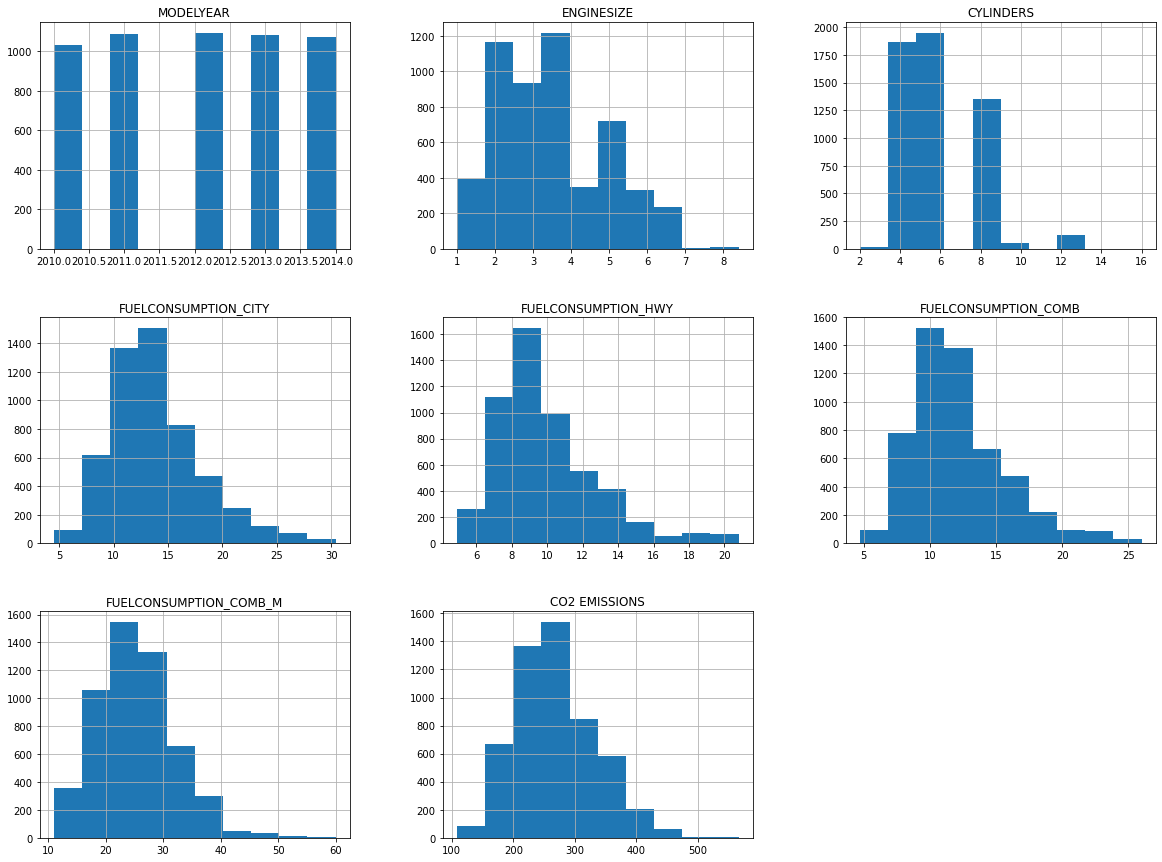

In [10]:
#plt.figure(dpi=200)
df.hist(figsize = (20,15))
#plt.show()

In [11]:
df.describe().transpose() # printing the basic statistics of the dataset 

,count,mean,std,min,25%,50%,75%,max
MODELYEAR,5359.0,2012.014742,1.404536,2010.0,2011.0,2012.0,2013.0,2014.0
ENGINESIZE,5359.0,3.491901,1.390957,1.0,2.4,3.5,4.6,8.4
CYLINDERS,5359.0,5.962120,1.872838,2.0,4.0,6.0,8.0,16.0
FUELCONSUMPTION_CITY,5359.0,13.902650,4.162894,4.5,11.0,13.2,16.0,30.4
FUELCONSUMPTION_HWY,5359.0,9.932208,2.807196,4.9,8.0,9.3,11.2,20.8
FUELCONSUMPTION_COMB,5359.0,12.116328,3.524127,4.7,9.7,11.4,13.9,26.0
FUELCONSUMPTION_COMB_M,5359.0,25.168875,6.956407,11.0,20.0,25.0,29.0,60.0
CO2 EMISSIONS,5359.0,267.660198,64.317040,108.0,221.0,260.0,305.0,566.0


In [12]:
#df.drop("MODEL YEAR",axis=1,inplace=True)# dropping model year cause it only contains one repeated value
df.corr()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_M,CO2 EMISSIONS
MODELYEAR,1.000000,-0.059026,-0.056762,-0.089863,-0.101831,-0.094261,0.125379,-0.126525
ENGINESIZE,-0.059026,1.000000,0.917291,0.815753,0.771050,0.806126,-0.803472,0.857052
CYLINDERS,-0.056762,0.917291,1.000000,0.784184,0.716811,0.766065,-0.754037,0.840469
FUELCONSUMPTION_CITY,-0.089863,0.815753,0.784184,1.000000,0.965417,0.995566,-0.932240,0.891427
FUELCONSUMPTION_HWY,-0.101831,0.771050,0.716811,0.965417,1.000000,0.985518,-0.895407,0.855552
FUELCONSUMPTION_COMB,-0.094261,0.806126,0.766065,0.995566,0.985518,1.000000,-0.926282,0.885359
FUELCONSUMPTION_COMB_M,0.125379,-0.803472,-0.754037,-0.932240,-0.895407,-0.926282,1.000000,-0.897255
CO2 EMISSIONS,-0.126525,0.857052,0.840469,0.891427,0.855552,0.885359,-0.897255,1.000000


# 2a: Using the numerical continuous variables in dataset to build a model to predict the CO2 emission

In [3]:
import sklearn
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler 
from keras.models import Sequential # The model class is sequentially arranged
from keras.layers import Dense, Dropout #Dense indicates fully connected networks
from keras.losses import mean_squared_error #loss
from keras.metrics import mean_squared_error #Evaluate metrics
from sklearn.metrics import r2_score

The numerical continuous variable within the data set was identified which are FUELCONSUMPTION_CITY, FUELCONSUMPTION_HWY, FUELCONSUMPTION_COMB, FUELCONSUMPTION_COMB_M and CO2 EMISSIONS.

The predictor variable includes : FUELCONSUMPTION_HWY, FUELCONSUMPTION_COMB, FUELCONSUMPTION_COMB_ while the target variable is CO2 EMISSIONS.

In [14]:
# Assigning x and y variables for training
# y=w1x + W0 where w1= slope and w0= y intercept
#hw(x)=w1x+w0
x=df[["FUELCONSUMPTION_CITY","FUELCONSUMPTION_HWY","FUELCONSUMPTION_COMB","FUELCONSUMPTION_COMB_M"]] #predictor variables
y=df["CO2 EMISSIONS"]#predictor variable
print(x.head())
print(y.head())

   FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  FUELCONSUMPTION_COMB  \
0                  10.9                  7.8                   9.5   
1                  10.0                  7.6                   8.9   
2                  11.6                  8.1                  10.0   
3                  14.8                 11.3                  13.2   
4                  13.2                 10.3                  11.9   

   FUELCONSUMPTION_COMB_M  
0                      30  
1                      32  
2                      28  
3                      21  
4                      24  
0    219
1    205
2    230
3    304
4    274
Name: CO2 EMISSIONS, dtype: int64


In [18]:
#subsets part of the data test for training and testing randomnly
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [19]:
#scales variable for learning to fractions between 0 and 1
scaler = MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

**Building a simple model----Constructor stage**

In [21]:
x_train.shape

(4287, 4)

In [22]:
# instantiating the model 
model = Sequential() 
model.add(Dense(units=64,input_dim=(4), activation = 'relu')) 
model.add(Dropout(0.2)) 
model.add(Dense(units=64,activation='relu')) 
model.add(Dense(units=1,activation = 'linear')) 

In [23]:
# Printing the summary of my model 
model.summary() 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                320       
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,545
Trainable params: 4,545
Non-trainable params: 0
_________________________________________________________________


**Compilation stage**

In [24]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics='mean_squared_error') 

**Trainning Stage**

In [25]:
# Assigning to history to plot the loss  
from keras.callbacks import EarlyStopping # imported EarlyStopping 
early_stopping = EarlyStopping(monitor='val_loss',patience=20) # added early stopping with patience = 20 
history=model.fit(x=x_train,y=y_train, batch_size=None, epochs=20, verbose='auto', validation_split=0.1,callbacks=[early_stopping]) 

Epoch 1/20
121/121 [==============================] - 1s 2ms/step - loss: 72269.8672 - mean_squared_error: 72269.8672 - val_loss: 59767.9609 - val_mean_squared_error: 59767.9609
Epoch 2/20
121/121 [==============================] - 0s 1ms/step - loss: 33579.0742 - mean_squared_error: 33579.0742 - val_loss: 6210.6211 - val_mean_squared_error: 6210.6211
Epoch 3/20
121/121 [==============================] - 0s 1ms/step - loss: 2469.3042 - mean_squared_error: 2469.3042 - val_loss: 1305.6331 - val_mean_squared_error: 1305.6331
Epoch 4/20
121/121 [==============================] - 0s 1ms/step - loss: 1643.6986 - mean_squared_error: 1643.6986 - val_loss: 1173.1174 - val_mean_squared_error: 1173.1174
Epoch 5/20
121/121 [==============================] - 0s 1ms/step - loss: 1557.8831 - mean_squared_error: 1557.8831 - val_loss: 1062.9595 - val_mean_squared_error: 1062.9595
Epoch 6/20
121/121 [==============================] - 0s 1ms/step - loss: 1447.3359 - mean_squared_error: 1447.3359 - val_lo

**EVALUATION**

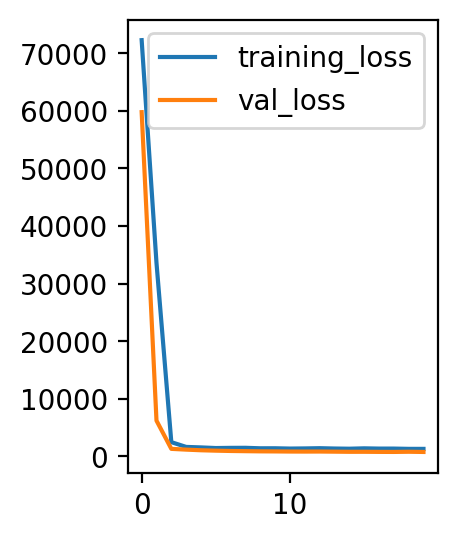

In [26]:
## checking for overfitting  
history_df = pd.DataFrame(history.history) 
plt.figure(figsize = (2,3),dpi=200) 
plt.plot(history_df['loss'], label='training_loss') 
plt.plot(history_df['val_loss'], label='val_loss') 
plt.legend() 
plt.show()

In [27]:
#THIS INDICATES THAT THE MODEL DOES NOT OVERFIT

In [35]:
## Evaluation on the test data 
test_loss, test_acc = model.evaluate(x_test,y_test)

34/34 [==============================] - 0s 470us/step - loss: 868.4233 - mean_squared_error: 868.4233


In [36]:
# Print the test loss and accuracy
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

Test loss: 868.42333984375
Test accuracy: 868.42333984375


In [45]:
# Make predictions on the data
y_pred = predictions = model.predict(x_test)

34/34 [==============================] - 0s 374us/step


In [46]:
# Calculate the MSE
mse = mean_squared_error(y_test, y_pred)
print(mse)

tf.Tensor([7652.8247 4125.522  4800.519  ... 4145.1606 5668.485  4538.1123], shape=(1072,), dtype=float32)


In [49]:
# Calculate the R^2
r2 = r2_score(y_test, y_pred)
print(r2)

0.7887122390584898


34/34 [==============================] - 0s 458us/step


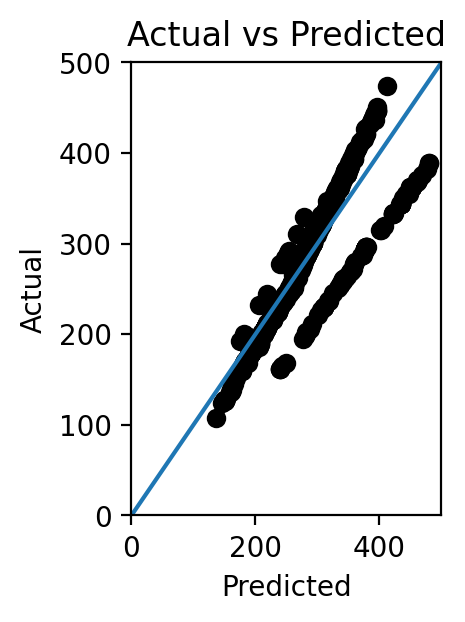

In [50]:
## Plotting the regression values
y_pred = model.predict(x_test)
plt.figure(dpi=200, figsize = (2,3))
plt.scatter(y_pred,y_test, color ='k')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Actual vs Predicted')
plt.xlim([0, 500])
plt.ylim([0,500])
plt.plot([0, 500],[0,500])
plt.show()

# 2b: Using a random SUBSET of the four continuous variables in the dataset to build a model to predict the CO2 emission.

Here a multivarate model is defimnes utilizing 3 subsets within the inital numerical continuous variable.

FUELCONSUMPTION_CITY, FUELCONSUMPTION_HWY, and FUELCONSUMPTION_COMB Continious variables is utilized to build a 2nd model

In [51]:
x1=df[["FUELCONSUMPTION_CITY","FUELCONSUMPTION_HWY","FUELCONSUMPTION_COMB"]] #predictor variables
y1=df["CO2 EMISSIONS"]#predictor variable
print(x1.head())
print(y1.head())

   FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  FUELCONSUMPTION_COMB
0                  10.9                  7.8                   9.5
1                  10.0                  7.6                   8.9
2                  11.6                  8.1                  10.0
3                  14.8                 11.3                  13.2
4                  13.2                 10.3                  11.9
0    219
1    205
2    230
3    304
4    274
Name: CO2 EMISSIONS, dtype: int64


In [52]:
#subsets part of the data test for training and testing randomnly
x_train, x_test, y_train,y_test = train_test_split(x1,y1,test_size=0.2,random_state=42)

In [53]:
scaler = MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [60]:
# instantiating the model 
model2 = Sequential() 
model2.add(Dense(units=64,input_dim=(3), activation = 'relu')) 
model2.add(Dropout(0.2)) 
model2.add(Dense(units=64,activation='relu')) 
model2.add(Dense(units=1,activation = 'linear')) 

In [61]:
model2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 64)                256       
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_19 (Dense)            (None, 64)                4160      
                                                                 
 dense_20 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,481
Trainable params: 4,481
Non-trainable params: 0
_________________________________________________________________


In [65]:
model2.compile(optimizer='adam', loss='mean_squared_error', metrics='mean_squared_error') 

In [66]:
#the fit method is used to train a model using a given dataset, used on supervised learning algorithm
SubSet=model2.fit(x=x_train,y=y_train,batch_size=None,epochs=10,verbose='auto',validation_split=0.1,callbacks=[early_stopping])

Epoch 1/10
121/121 [==============================] - 1s 2ms/step - loss: 72918.2422 - mean_squared_error: 72918.2422 - val_loss: 62301.7031 - val_mean_squared_error: 62301.7031
Epoch 2/10
121/121 [==============================] - 0s 1ms/step - loss: 38515.2891 - mean_squared_error: 38515.2891 - val_loss: 10909.4717 - val_mean_squared_error: 10909.4717
Epoch 3/10
121/121 [==============================] - 0s 1ms/step - loss: 3376.7603 - mean_squared_error: 3376.7603 - val_loss: 886.1216 - val_mean_squared_error: 886.1216
Epoch 4/10
121/121 [==============================] - 0s 1ms/step - loss: 1566.8484 - mean_squared_error: 1566.8484 - val_loss: 865.6645 - val_mean_squared_error: 865.6645
Epoch 5/10
121/121 [==============================] - 0s 1ms/step - loss: 1521.7518 - mean_squared_error: 1521.7518 - val_loss: 871.4703 - val_mean_squared_error: 871.4703
Epoch 6/10
121/121 [==============================] - 0s 1ms/step - loss: 1457.6370 - mean_squared_error: 1457.6370 - val_loss: 

**Model2 Evaluation**

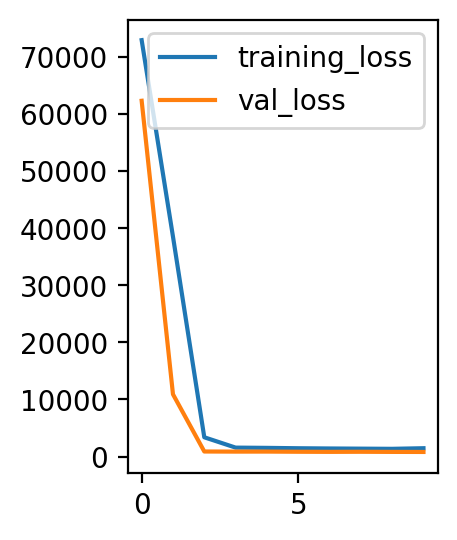

In [70]:
## checking for overfitting  
history_df = pd.DataFrame(SubSet.history) 
plt.figure(figsize = (2,3),dpi=200) 
plt.plot(history_df['loss'], label='training_loss') 
plt.plot(history_df['val_loss'], label='val_loss') 
plt.legend() 
plt.show()

In [71]:
#THIS INDICATES THAT THE MODEL DOES NOT OVERFIT

In [73]:
## Evaluation on the test data 
test_loss, test_acc = model2.evaluate(x_test,y_test)

34/34 [==============================] - 0s 766us/step - loss: 967.2466 - mean_squared_error: 967.2466


In [74]:
# Print the test loss and accuracy
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

Test loss: 967.24658203125
Test accuracy: 967.24658203125


In [76]:
# Make predictions on the data
y_pred = predictions = model2.predict(x_test)

34/34 [==============================] - 0s 354us/step


In [77]:
# Calculate the MSE
mse = mean_squared_error(y_test, y_pred)
print(mse)

tf.Tensor([8529.942  4165.502  4855.401  ... 4197.9766 5778.3535 4684.9907], shape=(1072,), dtype=float32)


In [78]:
# Calculate the R^2
r2 = r2_score(y_test, y_pred)
print(r2)

0.7646685332348426


34/34 [==============================] - 0s 482us/step


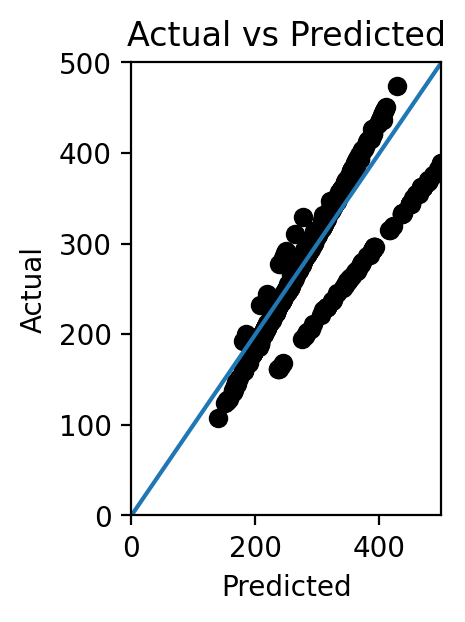

In [79]:
## Plotting the regression values
y_pred = model2.predict(x_test)
plt.figure(dpi=200, figsize = (2,3))
plt.scatter(y_pred,y_test, color ='k')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Actual vs Predicted')
plt.xlim([0, 500])
plt.ylim([0,500])
plt.plot([0, 500],[0,500])
plt.show()

# 3: Determine whether there were any noticeable improvements in the CO2 emission from year 2010 to year 2014?

In [80]:
corr = df['MODELYEAR'].corr(df['CO2 EMISSIONS'])

In [81]:
print(corr)

-0.12652454064157603


From the table above. The Co2 Emissions is inversely correlated in value to the model Year with a magnitude of - 0.126525. This indicates that the CO2 emissions is getting smaller, hence an improvement as the years proceeded from 2010 to 2014 within the data.

In [82]:
df.corr()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_M,CO2 EMISSIONS
MODELYEAR,1.000000,-0.059026,-0.056762,-0.089863,-0.101831,-0.094261,0.125379,-0.126525
ENGINESIZE,-0.059026,1.000000,0.917291,0.815753,0.771050,0.806126,-0.803472,0.857052
CYLINDERS,-0.056762,0.917291,1.000000,0.784184,0.716811,0.766065,-0.754037,0.840469
FUELCONSUMPTION_CITY,-0.089863,0.815753,0.784184,1.000000,0.965417,0.995566,-0.932240,0.891427
FUELCONSUMPTION_HWY,-0.101831,0.771050,0.716811,0.965417,1.000000,0.985518,-0.895407,0.855552
FUELCONSUMPTION_COMB,-0.094261,0.806126,0.766065,0.995566,0.985518,1.000000,-0.926282,0.885359
FUELCONSUMPTION_COMB_M,0.125379,-0.803472,-0.754037,-0.932240,-0.895407,-0.926282,1.000000,-0.897255
CO2 EMISSIONS,-0.126525,0.857052,0.840469,0.891427,0.855552,0.885359,-0.897255,1.000000


In [85]:
Y = df['CO2 EMISSIONS']
X = df['MODELYEAR']

Text(0, 0.5, 'CO2 EMISSION')

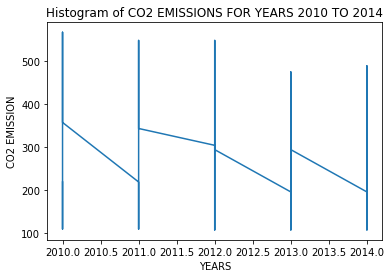

In [92]:
# Plot the histogram
plt.plot(X, Y)
plt.title('Histogram of CO2 EMISSIONS FOR YEARS 2010 TO 2014')
plt.xlabel('YEARS')
plt.ylabel('CO2 EMISSION')

**The line plot above also shows that emissions are reducing through the years which indicates improvement in C02 emissions**

# 4: Using  each  categorical  variable  as  the  target  variable  at  each  instance,  determine which  of  the  variables  performed  best  in  classifying  the  dataset

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("Fuel Consumption Ratings.csv")

In [12]:
import sklearn
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler 
from keras.models import Sequential # The model class is sequentially arranged
from keras.layers import Dense, Dropout #Dense indicates fully connected networks
from keras.losses import mean_squared_error #loss
from keras.metrics import mean_squared_error #Evaluate metrics
from sklearn.metrics import r2_score

In [13]:
from keras.losses import categorical_crossentropy, sparse_categorical_crossentropy
from keras.metrics import accuracy
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from keras.utils import to_categorical

In [14]:
print(df.dtypes)


MODELYEAR                   int64
MAKE                       object
MODEL                      object
VEHICLECLASS               object
ENGINESIZE                float64
CYLINDERS                   int64
TRANSMISSION               object
FUELTYPE                   object
FUELCONSUMPTION_CITY      float64
FUELCONSUMPTION_HWY       float64
FUELCONSUMPTION_COMB      float64
FUELCONSUMPTION_COMB_M      int64
CO2 EMISSIONS               int64
dtype: object


In [15]:
df = df.drop(labels='MODEL', axis=1)

In [16]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5359 entries, 0 to 5358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MODELYEAR               5359 non-null   int64  
 1   MAKE                    5359 non-null   object 
 2   VEHICLECLASS            5359 non-null   object 
 3   ENGINESIZE              5359 non-null   float64
 4   CYLINDERS               5359 non-null   int64  
 5   TRANSMISSION            5359 non-null   object 
 6   FUELTYPE                5359 non-null   object 
 7   FUELCONSUMPTION_CITY    5359 non-null   float64
 8   FUELCONSUMPTION_HWY     5359 non-null   float64
 9   FUELCONSUMPTION_COMB    5359 non-null   float64
 10  FUELCONSUMPTION_COMB_M  5359 non-null   int64  
 11  CO2 EMISSIONS           5359 non-null   int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 502.5+ KB


**To answer the question above, we build a sequential model and iterate through the columns for colunm types= object (This indicates the categoritical variables, the inputs are run within a for loop and its performance indicators recorded for each categoritical variable choosen.**

In [52]:
# Store the accuracy scores for each variable in a dictionary
accuracy_scores = {}

# Loop over the categorical variables
for col in df.columns:
    if df[col].dtype == 'object':
        X = df[["FUELCONSUMPTION_CITY","FUELCONSUMPTION_HWY","FUELCONSUMPTION_COMB","FUELCONSUMPTION_COMB_M"]]
        y = df[col]
        y_true=y
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        scaler = MinMaxScaler()
        X_train=scaler.fit_transform(X_train)
        X_test=scaler.transform(X_test)
        model3 = Sequential()
        #model3.add(Dense(units=64,input_shape = (len(df[col].unique()),),activation = 'relu')) # the input_shape of 2 corresponds to the predictor variables
        model3.add(Dense(units=64,input_shape = (4,),activation = 'relu'))
        model3.add(Dropout(0.2))
        model3.add(Dense(units=256, activation = 'relu'))
        model3.add(Dense(units=256, activation = 'relu'))
        model3.add(Dense(units=(len(df[col].unique())),activation ='softmax'))
        model3.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')
        # Reshaping is important for one hot encoding
        y_train=y_train.values.reshape(-1,1)
        y_test=y_test.values.reshape(-1,1)
        # For integer encoding use sparse_categorical_crossentropy as the loss function
        le = LabelEncoder()
        y_train_le=le.fit_transform(y_train)
        y_test_le=le.transform(y_test)
        #One-hot encoding is a process used to convert categorical variables, which are variables that can take on a limited number of values, into a numerical representation that can be used in machine learning models           
        ohe = OneHotEncoder()
        y_train_ohe=ohe.fit_transform(y_train)
        y_train_ohe=y_train_ohe.toarray()
        y_test_ohe=ohe.transform(y_test)
        y_test_ohe=y_test_ohe.toarray()
        CatModel=model3.fit(X_train,y_train_ohe, epochs=30,validation_split=0.20)
        #Evaluation
        y_pred = predictions = model3.predict(X_test)
        test_loss, test_acc = model3.evaluate(X_test, y_test_ohe, verbose=2)
        accuracy_scores[col] = ["Test_loss="+str(test_loss),"Test_Accuracy="+str(test_acc)]
accuracy_scores
        
               

Epoch 1/30


C:\Users\732093\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\732093\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


108/108 [==============================] - 1s 3ms/step - loss: 3.3878 - accuracy: 0.0863 - val_loss: 3.1994 - val_accuracy: 0.1096
Epoch 2/30
108/108 [==============================] - 0s 2ms/step - loss: 3.1786 - accuracy: 0.1070 - val_loss: 3.1255 - val_accuracy: 0.1212
Epoch 3/30
108/108 [==============================] - 0s 2ms/step - loss: 3.1254 - accuracy: 0.1111 - val_loss: 3.0872 - val_accuracy: 0.1072
Epoch 4/30
108/108 [==============================] - 0s 2ms/step - loss: 3.0981 - accuracy: 0.1105 - val_loss: 3.0570 - val_accuracy: 0.1329
Epoch 5/30
108/108 [==============================] - 0s 2ms/step - loss: 3.0733 - accuracy: 0.1158 - val_loss: 3.0566 - val_accuracy: 0.1259
Epoch 6/30
108/108 [==============================] - 0s 2ms/step - loss: 3.0566 - accuracy: 0.1190 - val_loss: 3.0248 - val_accuracy: 0.1399
Epoch 7/30
108/108 [==============================] - 0s 2ms/step - loss: 3.0248 - accuracy: 0.1231 - val_loss: 2.9923 - val_accuracy: 0.1469
Epoch 8/30
108/10

C:\Users\732093\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\732093\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


108/108 [==============================] - 1s 3ms/step - loss: 2.4669 - accuracy: 0.1954 - val_loss: 2.2666 - val_accuracy: 0.2319
Epoch 2/30
108/108 [==============================] - 0s 2ms/step - loss: 2.3060 - accuracy: 0.2129 - val_loss: 2.2315 - val_accuracy: 0.2448
Epoch 3/30
108/108 [==============================] - 0s 2ms/step - loss: 2.2579 - accuracy: 0.2283 - val_loss: 2.2021 - val_accuracy: 0.2564
Epoch 4/30
108/108 [==============================] - 0s 2ms/step - loss: 2.2096 - accuracy: 0.2394 - val_loss: 2.1522 - val_accuracy: 0.2657
Epoch 5/30
108/108 [==============================] - 0s 2ms/step - loss: 2.1602 - accuracy: 0.2520 - val_loss: 2.0930 - val_accuracy: 0.2716
Epoch 6/30
108/108 [==============================] - 0s 2ms/step - loss: 2.1088 - accuracy: 0.2695 - val_loss: 2.0507 - val_accuracy: 0.2739
Epoch 7/30
108/108 [==============================] - 0s 2ms/step - loss: 2.0826 - accuracy: 0.2718 - val_loss: 2.0473 - val_accuracy: 0.2669
Epoch 8/30
108/10

C:\Users\732093\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\732093\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


108/108 [==============================] - 1s 4ms/step - loss: 2.4156 - accuracy: 0.2266 - val_loss: 2.2872 - val_accuracy: 0.2343
Epoch 2/30
108/108 [==============================] - 0s 2ms/step - loss: 2.2557 - accuracy: 0.2476 - val_loss: 2.2528 - val_accuracy: 0.2494
Epoch 3/30
108/108 [==============================] - 0s 2ms/step - loss: 2.2279 - accuracy: 0.2558 - val_loss: 2.2342 - val_accuracy: 0.2576
Epoch 4/30
108/108 [==============================] - 0s 1ms/step - loss: 2.2115 - accuracy: 0.2587 - val_loss: 2.2094 - val_accuracy: 0.2249
Epoch 5/30
108/108 [==============================] - 0s 2ms/step - loss: 2.1834 - accuracy: 0.2689 - val_loss: 2.1859 - val_accuracy: 0.2471
Epoch 6/30
108/108 [==============================] - 0s 2ms/step - loss: 2.1578 - accuracy: 0.2826 - val_loss: 2.1540 - val_accuracy: 0.2914
Epoch 7/30
108/108 [==============================] - 0s 2ms/step - loss: 2.1259 - accuracy: 0.2989 - val_loss: 2.1432 - val_accuracy: 0.2657
Epoch 8/30
108/10

C:\Users\732093\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\732093\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


108/108 [==============================] - 1s 3ms/step - loss: 0.9645 - accuracy: 0.5305 - val_loss: 0.8062 - val_accuracy: 0.6061
Epoch 2/30
108/108 [==============================] - 0s 2ms/step - loss: 0.8356 - accuracy: 0.5710 - val_loss: 0.8141 - val_accuracy: 0.5956
Epoch 3/30
108/108 [==============================] - 0s 2ms/step - loss: 0.8256 - accuracy: 0.5731 - val_loss: 0.7873 - val_accuracy: 0.6084
Epoch 4/30
108/108 [==============================] - 0s 1ms/step - loss: 0.8136 - accuracy: 0.5868 - val_loss: 0.7984 - val_accuracy: 0.6084
Epoch 5/30
108/108 [==============================] - 0s 2ms/step - loss: 0.8092 - accuracy: 0.5923 - val_loss: 0.7711 - val_accuracy: 0.6457
Epoch 6/30
108/108 [==============================] - 0s 2ms/step - loss: 0.7969 - accuracy: 0.6089 - val_loss: 0.7663 - val_accuracy: 0.6387
Epoch 7/30
108/108 [==============================] - 0s 2ms/step - loss: 0.7919 - accuracy: 0.6025 - val_loss: 0.7520 - val_accuracy: 0.6445
Epoch 8/30
108/10

{'MAKE': ['Test_loss=2.718357563018799', 'Test_Accuracy=0.1772388070821762'],
 'VEHICLECLASS': ['Test_loss=1.967288613319397',
  'Test_Accuracy=0.2845149338245392'],
 'TRANSMISSION': ['Test_loss=2.080409288406372',
  'Test_Accuracy=0.29944029450416565'],
 'FUELTYPE': ['Test_loss=0.743067741394043',
  'Test_Accuracy=0.6623134613037109']}

**Determine which of  the variables  performed  best  in  classifying  the  dataset based on the Test loss and test accuracy of each inputed categoritical variable is tabled below is the FUELTYPE variable. It have the least Test loss and the MAX Test Accuracy** 

In [50]:
accuracy_scores

{'MAKE': ['Test_loss=2.7520365715026855', 'Test_Accuracy=0.1735074669122696'],
 'VEHICLECLASS': ['Test_loss=2.022200584411621',
  'Test_Accuracy=0.2901119291782379'],
 'TRANSMISSION': ['Test_loss=1.9697998762130737',
  'Test_Accuracy=0.33208954334259033'],
 'FUELTYPE': ['Test_loss=0.7379499077796936',
  'Test_Accuracy=0.6436567306518555']}

# 8: Use only the non-categorical variables to form groups. Using internal and external evaluation metrics, determine which categorical variable best describes the groups formed. 

In [54]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, adjusted_rand_score

# Load the data into a dataframe
df = pd.read_csv("Fuel Consumption Ratings.csv")

# Select the non-categorical variables
X = df[["FUELCONSUMPTION_CITY","FUELCONSUMPTION_HWY","FUELCONSUMPTION_COMB","FUELCONSUMPTION_COMB_M","CO2 EMISSIONS"]]

# Standardize the non-categorical variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Use k-means to form the groups
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_scaled)

# Calculate the silhouette score for the groups formed by k-means
silhouette_score(X_scaled, kmeans.labels_)

# Loop over each categorical variable
for col in df.columns:
    if df[col].dtype == 'object':
        # Calculate the adjusted Rand score for the groups defined by the categorical variable
        score = adjusted_rand_score(df[col], kmeans.labels_)
        print(f'Adjusted Rand score for {col}: {score}')

C:\Users\732093\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adjusted Rand score for MAKE: 0.021773230314777646
Adjusted Rand score for MODEL: 0.003029715827743017
Adjusted Rand score for VEHICLECLASS: 0.051529305597856186
Adjusted Rand score for TRANSMISSION: 0.02449598846733752
Adjusted Rand score for FUELTYPE: 0.0790536624828128


**The categorical variable with the highest adjusted Rand score is the one that best describes the groups formed by k-means which equals the FUELTYPE Categoritical variable**